In [101]:
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
file = "../Resources/healthcare_dataset.csv"
hospital_df = pd.read_csv(file)
hospital_df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [103]:
# year test
isCurrent("2024")

True

In [104]:
'''original datatypes'''
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [105]:
'''Change Date of Admission and Discharge Date to date_time ''' 
hospital_df['Date of Admission'] = pd.to_datetime(hospital_df['Date of Admission'])
hospital_df['Discharge Date'] = pd.to_datetime(hospital_df['Discharge Date'])

In [106]:
''' Filter out 2024 Dates'''
hospital_df_2024 = hospital_df[hospital_df['Date of Admission'].dt.year == 2024]

hospital_df_2024.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
50,mIchael LiU,30,Male,AB-,Hypertension,2024-04-05,Vicki Nguyen,"Fernandez and Phillips, Singh",Medicare,30590.541806,456,Emergency,2024-04-22,Paracetamol,Inconclusive
61,Kim ScOtt,63,Male,A-,Asthma,2024-04-07,Cindy Ellis,Scott-Kelly,UnitedHealthcare,39723.166051,244,Emergency,2024-05-04,Ibuprofen,Inconclusive
68,MicHAEl MillEr,31,Male,B+,Diabetes,2024-02-06,Jonathan Drake,"Clark Brown, and Myers",UnitedHealthcare,35776.815111,489,Emergency,2024-02-10,Penicillin,Normal
79,tiMOThY myers,61,Male,B+,Cancer,2024-03-02,Timothy Baker,and Sons Reyes,UnitedHealthcare,29504.387442,422,Urgent,2024-03-26,Ibuprofen,Inconclusive


In [107]:
''' Checking new data types'''
hospital_df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3854 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                3854 non-null   object        
 1   Age                 3854 non-null   int64         
 2   Gender              3854 non-null   object        
 3   Blood Type          3854 non-null   object        
 4   Medical Condition   3854 non-null   object        
 5   Date of Admission   3854 non-null   datetime64[ns]
 6   Doctor              3854 non-null   object        
 7   Hospital            3854 non-null   object        
 8   Insurance Provider  3854 non-null   object        
 9   Billing Amount      3854 non-null   float64       
 10  Room Number         3854 non-null   int64         
 11  Admission Type      3854 non-null   object        
 12  Discharge Date      3854 non-null   datetime64[ns]
 13  Medication          3854 non-null   object        
 

In [108]:
''' Can't Groupby without aggregate (ex: count(), mean(), median())'''
# tries to print but does not.
hospital_df_2024.groupby('Hospital')

In [109]:

# how to set column 'Hospital' as the index but it removes the previous index
hospital_df_2024.set_index('Hospital').head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
Hospital,,,,,,,,,,,,,,
Sons and Miller,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
"Fernandez and Phillips, Singh",mIchael LiU,30,Male,AB-,Hypertension,2024-04-05,Vicki Nguyen,Medicare,30590.541806,456,Emergency,2024-04-22,Paracetamol,Inconclusive
Scott-Kelly,Kim ScOtt,63,Male,A-,Asthma,2024-04-07,Cindy Ellis,UnitedHealthcare,39723.166051,244,Emergency,2024-05-04,Ibuprofen,Inconclusive
"Clark Brown, and Myers",MicHAEl MillEr,31,Male,B+,Diabetes,2024-02-06,Jonathan Drake,UnitedHealthcare,35776.815111,489,Emergency,2024-02-10,Penicillin,Normal
and Sons Reyes,tiMOThY myers,61,Male,B+,Cancer,2024-03-02,Timothy Baker,UnitedHealthcare,29504.387442,422,Urgent,2024-03-26,Ibuprofen,Inconclusive


In [110]:

# as an example when chaining .set_index() we lose the previous column 'Hospital'
hospital_df_2024.set_index('Hospital').set_index('Doctor').head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
Doctor,,,,,,,,,,,,,
Matthew Smith,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
Vicki Nguyen,mIchael LiU,30,Male,AB-,Hypertension,2024-04-05,Medicare,30590.541806,456,Emergency,2024-04-22,Paracetamol,Inconclusive
Cindy Ellis,Kim ScOtt,63,Male,A-,Asthma,2024-04-07,UnitedHealthcare,39723.166051,244,Emergency,2024-05-04,Ibuprofen,Inconclusive
Jonathan Drake,MicHAEl MillEr,31,Male,B+,Diabetes,2024-02-06,UnitedHealthcare,35776.815111,489,Emergency,2024-02-10,Penicillin,Normal
Timothy Baker,tiMOThY myers,61,Male,B+,Cancer,2024-03-02,UnitedHealthcare,29504.387442,422,Urgent,2024-03-26,Ibuprofen,Inconclusive


In [111]:
# shows that variable hospital_df_2024 is unmutated by previous function.
# use inplace=True flag to mutate variable or store changes in new variable. 
hospital_df_2024.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
50,mIchael LiU,30,Male,AB-,Hypertension,2024-04-05,Vicki Nguyen,"Fernandez and Phillips, Singh",Medicare,30590.541806,456,Emergency,2024-04-22,Paracetamol,Inconclusive
61,Kim ScOtt,63,Male,A-,Asthma,2024-04-07,Cindy Ellis,Scott-Kelly,UnitedHealthcare,39723.166051,244,Emergency,2024-05-04,Ibuprofen,Inconclusive
68,MicHAEl MillEr,31,Male,B+,Diabetes,2024-02-06,Jonathan Drake,"Clark Brown, and Myers",UnitedHealthcare,35776.815111,489,Emergency,2024-02-10,Penicillin,Normal
79,tiMOThY myers,61,Male,B+,Cancer,2024-03-02,Timothy Baker,and Sons Reyes,UnitedHealthcare,29504.387442,422,Urgent,2024-03-26,Ibuprofen,Inconclusive


In [112]:
# we got rid of columns 'Room Number' and "Medication' using drop() function
# axis = 1 is vertical direction for columns. 
hospital_df_2024_drop = hospital_df_2024.drop(['Room Number', 'Medication'], axis=1)
hospital_df_2024_drop.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Normal
50,mIchael LiU,30,Male,AB-,Hypertension,2024-04-05,Vicki Nguyen,"Fernandez and Phillips, Singh",Medicare,30590.541806,Emergency,2024-04-22,Inconclusive
61,Kim ScOtt,63,Male,A-,Asthma,2024-04-07,Cindy Ellis,Scott-Kelly,UnitedHealthcare,39723.166051,Emergency,2024-05-04,Inconclusive
68,MicHAEl MillEr,31,Male,B+,Diabetes,2024-02-06,Jonathan Drake,"Clark Brown, and Myers",UnitedHealthcare,35776.815111,Emergency,2024-02-10,Normal
79,tiMOThY myers,61,Male,B+,Cancer,2024-03-02,Timothy Baker,and Sons Reyes,UnitedHealthcare,29504.387442,Urgent,2024-03-26,Inconclusive


In [113]:
# Generate the lenght of stay based on the difference of the discharge date and Admission Date.
hospital_df_2024_drop['Length of Stay'] = (hospital_df_2024_drop['Discharge Date'] - hospital_df_2024_drop['Date of Admission']).dt.days
hospital_df_2024_drop.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Test Results,Length of Stay
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Normal,2
50,mIchael LiU,30,Male,AB-,Hypertension,2024-04-05,Vicki Nguyen,"Fernandez and Phillips, Singh",Medicare,30590.541806,Emergency,2024-04-22,Inconclusive,17
61,Kim ScOtt,63,Male,A-,Asthma,2024-04-07,Cindy Ellis,Scott-Kelly,UnitedHealthcare,39723.166051,Emergency,2024-05-04,Inconclusive,27
68,MicHAEl MillEr,31,Male,B+,Diabetes,2024-02-06,Jonathan Drake,"Clark Brown, and Myers",UnitedHealthcare,35776.815111,Emergency,2024-02-10,Normal,4
79,tiMOThY myers,61,Male,B+,Cancer,2024-03-02,Timothy Baker,and Sons Reyes,UnitedHealthcare,29504.387442,Urgent,2024-03-26,Inconclusive,24


In [114]:
hospital_df_2024_drop['Cost Per Day'] = (hospital_df_2024_drop['Billing Amount'] / hospital_df_2024_drop['Length of Stay'])
hospital_df_2024_drop.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Test Results,Length of Stay,Cost Per Day
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Normal,2,9428.140653
50,mIchael LiU,30,Male,AB-,Hypertension,2024-04-05,Vicki Nguyen,"Fernandez and Phillips, Singh",Medicare,30590.541806,Emergency,2024-04-22,Inconclusive,17,1799.443636
61,Kim ScOtt,63,Male,A-,Asthma,2024-04-07,Cindy Ellis,Scott-Kelly,UnitedHealthcare,39723.166051,Emergency,2024-05-04,Inconclusive,27,1471.228372
68,MicHAEl MillEr,31,Male,B+,Diabetes,2024-02-06,Jonathan Drake,"Clark Brown, and Myers",UnitedHealthcare,35776.815111,Emergency,2024-02-10,Normal,4,8944.203778
79,tiMOThY myers,61,Male,B+,Cancer,2024-03-02,Timothy Baker,and Sons Reyes,UnitedHealthcare,29504.387442,Urgent,2024-03-26,Inconclusive,24,1229.349477


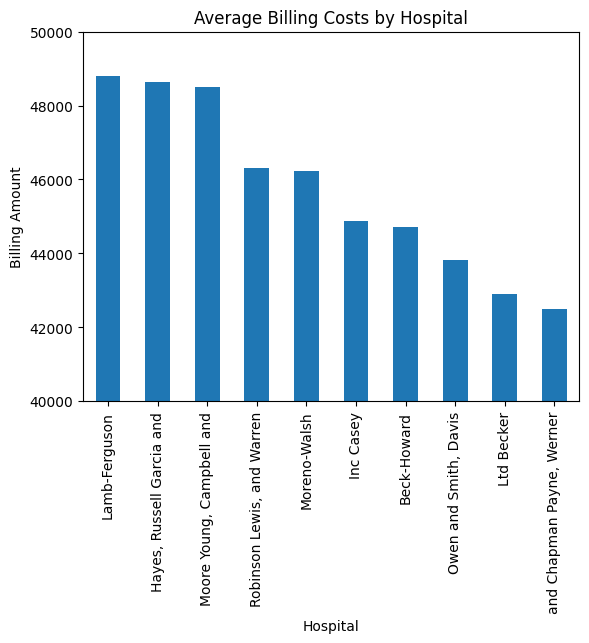

In [115]:
# Reveiw costs per day by hospital.
hospital_billing = hospital_df_2024_drop.groupby("Hospital")["Cost Per Day"].mean()

# Show billing amounts by hospital in decending order.
top_hospitals = hospital_billing.sort_values(ascending=False).head(10)

# Show a bor chart of the hospital vs billing amount.
top_hospitals.plot(kind="bar", title="Average Billing Costs by Hospital", xlabel="Hospital", ylabel="Billing Amount", ylim=(40000,50000))
plt.xticks(rotation=90)
plt.show()

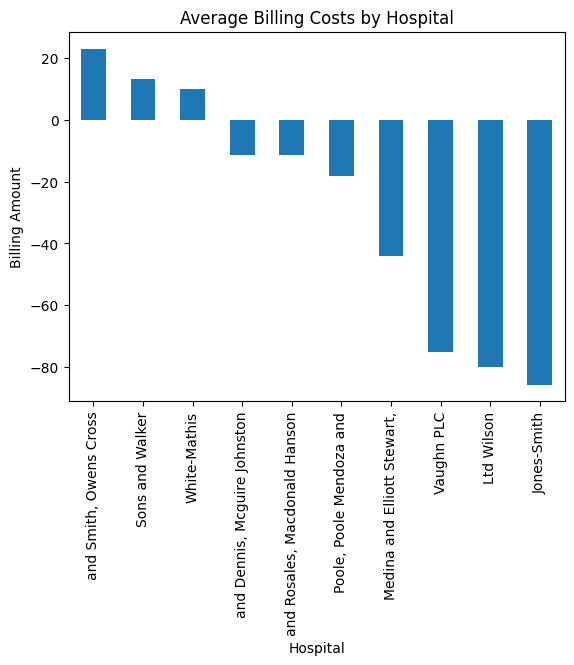

Hospital
and Smith, Owens Cross           23.027257
Sons and Walker                  13.152246
White-Mathis                      9.894518
and Dennis, Mcguire Johnston    -11.259863
and Rosales, Macdonald Hanson   -11.528964
Poole, Poole Mendoza and        -18.228829
Medina and Elliott Stewart,     -43.887286
Vaughn PLC                      -75.202313
Ltd Wilson                      -80.022134
Jones-Smith                     -85.609337
Name: Cost Per Day, dtype: float64

In [116]:
# Reveiw costs per day by hospital.
hospital_billing = hospital_df_2024_drop.groupby("Hospital")["Cost Per Day"].mean()

# Show billing amounts by hospital in decending order.
top_hospitals = hospital_billing.sort_values(ascending=False).tail(10)

# Show a bor chart of the hospital vs billing amount.
# Data is possibly skewed due to some patients possibly not having insurance.

top_hospitals.plot(kind="bar", title="Average Billing Costs by Hospital", xlabel="Hospital", ylabel="Billing Amount")
plt.xticks(rotation=90)
plt.show()
top_hospitals
# will not discuss unless brought up

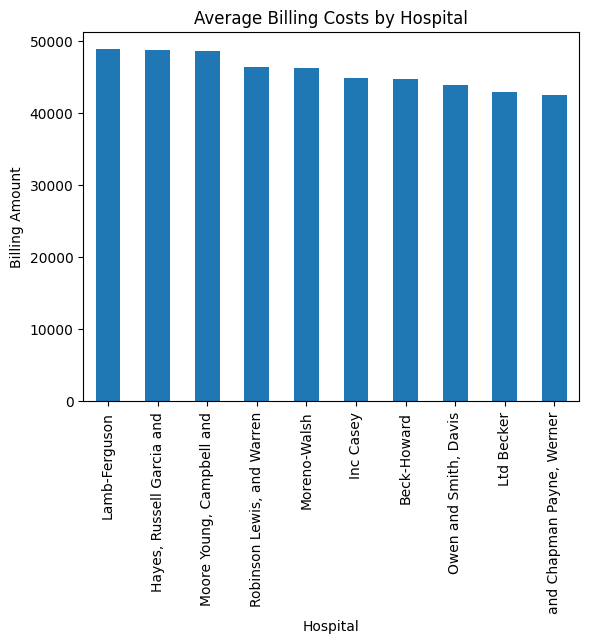

In [117]:
# Reveiw costs per day by hospital.
hospital_billing = hospital_df_2024_drop.groupby("Hospital")["Cost Per Day"].mean()

# Show billing amounts by hospital in decending order.
top_hospitals = hospital_billing.sort_values(ascending=False).head(10)

# Show a bor chart of the hospital vs billing amount.
top_hospitals.plot(kind="bar", title="Average Billing Costs by Hospital", xlabel="Hospital", ylabel="Billing Amount")
plt.xticks(rotation=90)
plt.show()

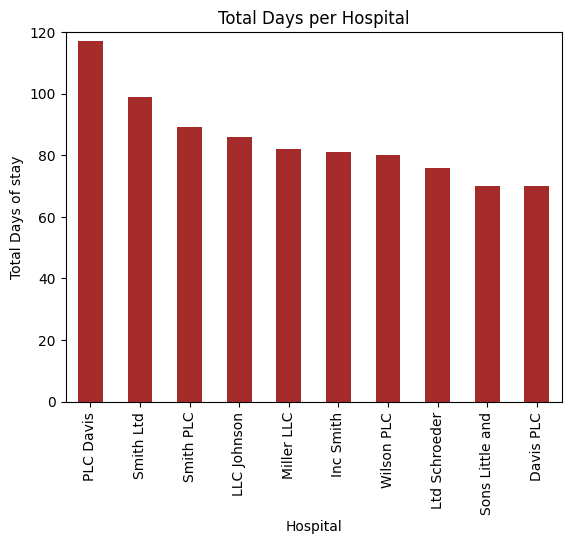

In [118]:
# Calculate the Length of stay by each hospital
hospital_stay = hospital_df_2024_drop.groupby("Hospital")["Length of Stay"].sum()

# Show lenght of stay by hospital in decending order.
top_hospitals = hospital_stay.sort_values(ascending=False).head(10)

# Show a line charg of the decending lenght of stay.
top_hospitals.plot(kind="bar", title="Total Days per Hospital", xlabel="Hospital", ylabel="Total Days of stay", color="brown", ylim=(0,120))
plt.xticks(rotation=90)

plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'PLC Davis'),
  Text(1, 0, 'Smith Ltd'),
  Text(2, 0, 'Smith PLC'),
  Text(3, 0, 'LLC Johnson'),
  Text(4, 0, 'Miller LLC'),
  Text(5, 0, 'Inc Smith'),
  Text(6, 0, 'Wilson PLC'),
  Text(7, 0, 'Ltd Schroeder'),
  Text(8, 0, 'Sons Little and'),
  Text(9, 0, 'Davis PLC')])

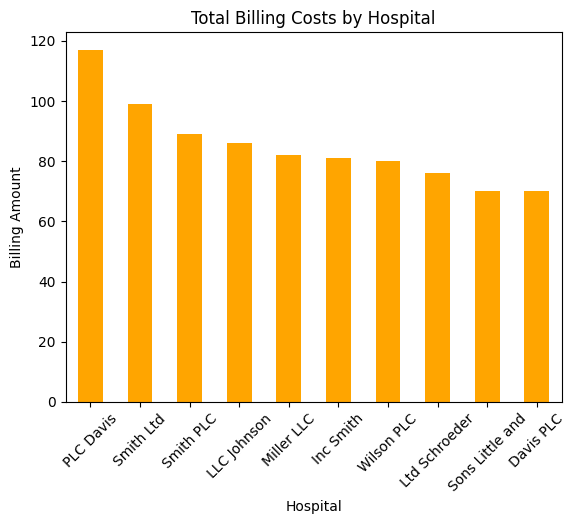

In [119]:
# Group by hospital and sum billing costs
hospital_billing = hospital_df_2024_drop.groupby("Hospital")["Billing Amount"].sum()

# Sort values and select top 10
hospital_billing = hospital_billing.sort_values(ascending=False).head(10)

# Create a bar plot
top_hospitals.plot(kind="bar", title="Total Billing Costs by Hospital", xlabel="Hospital", ylabel="Billing Amount", color="orange")
plt.xticks(rotation=45)

In [120]:
# Calculate the total billing costs for each medical condition

# Cancer, Hypertension, Asthma, Diabetes 
filtered_hospital_df_2024_drop = hospital_df_2024_drop[hospital_df_2024_drop["Medical Condition"].isin(["Cancer", "Hypertension", "Asthma", "Diabetes"])]

# Group by Medical Condition to calculate total billing costs
total_billing_by_condition = filtered_hospital_df_2024_drop.groupby("Medical Condition")["Billing Amount"].max()

# Merge the grouped data back with the original filtered dataset
merged_condition_data = pd.merge(total_billing_by_condition, filtered_hospital_df_2024_drop, on=["Medical Condition", "Billing Amount"], how="left")

# Display the merged DataFrame
print(merged_condition_data.head())


  Medical Condition  Billing Amount          Name  Age  Gender Blood Type  \
0            Asthma    49875.609804  ZAchary VEGa   68  Female         O+   
1            Cancer    51731.659884   jiLL DUDLey   78    Male        AB-   
2          Diabetes    50831.676417  AnGeLA jonES   46  Female         A+   
3      Hypertension    51147.726291  BreNDa Costa   59  Female         O+   

  Date of Admission           Doctor                       Hospital  \
0        2024-03-09   Thomas Barrett  Blankenship, Mcgee Palmer and   
1        2024-02-29  Joseph Chambers                    Aguilar PLC   
2        2024-04-05   Jonathan Cline     Hopkins, Compton Lewis and   
3        2024-04-01     Amanda Dixon                Peterson-Powell   

  Insurance Provider Admission Type Discharge Date  Test Results  \
0           Medicare       Elective     2024-03-23      Abnormal   
1              Aetna       Elective     2024-03-20        Normal   
2           Medicare       Elective     2024-04-23  In

(array([0, 1, 2]),
 [Text(0, 0, 'Elective'), Text(1, 0, 'Emergency'), Text(2, 0, 'Urgent')])

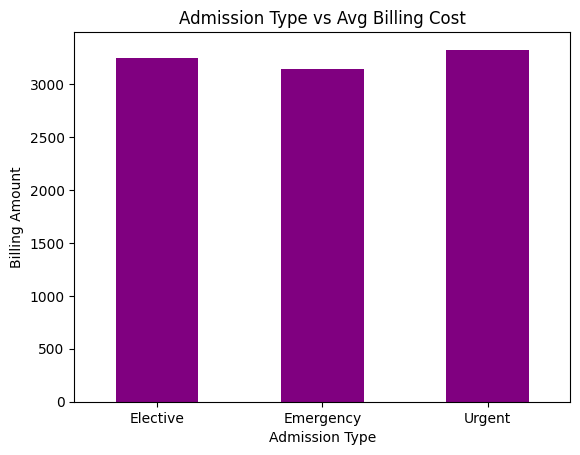

In [122]:
# creates df to store the average billing amount per admission type
admission_type_billing = hospital_df_2024_drop.groupby("Admission Type")["Cost Per Day"].mean()
# creates plot
admission_type_billing.plot(kind="bar", title="Admission Type vs Avg Billing Cost", xlabel="Admission Type", ylabel="Billing Amount", color='purple')
plt.xticks(rotation=0)



<Axes: title={'center': 'Blood Type vs Avg Billing Cost'}, xlabel='Blood Type', ylabel='Billing Amount'>

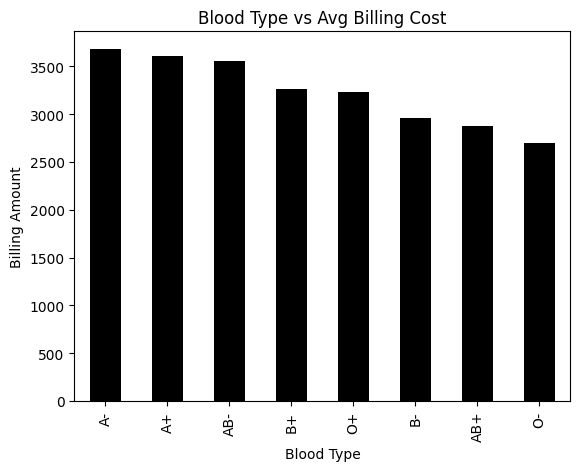

In [123]:
# creating a view of the avg cost per day vs the blood type
blood_type_billing = hospital_df_2024_drop.groupby("Blood Type")["Cost Per Day"].mean()
# orders the bloodtypes
blood_billing = blood_type_billing.sort_values(ascending=False)
# creates plot
blood_billing.plot(kind="bar", title="Blood Type vs Avg Billing Cost", xlabel="Blood Type", ylabel="Billing Amount", color='black')

In [124]:
counts = hospital_df["Insurance Provider"].value_counts()
counts

Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64

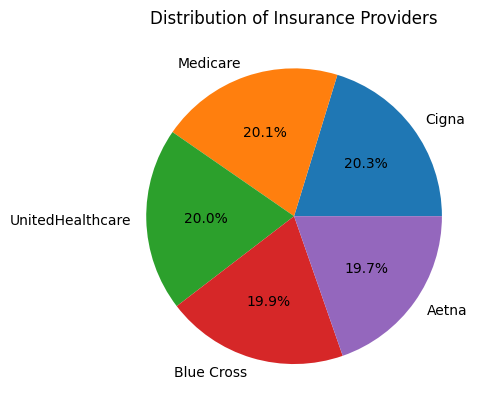

In [125]:
## Generate a pie chart, using Pandas, showing the distribution of Insurance provider used in the study
plt.pie(
   counts.values,
   labels=counts.index.values,
    autopct="%1.1f%%",
   
)
plt.title("Distribution of Insurance Providers"), 
# Get the distribution of Insurance provider used in the study
counts = hospital_df["Insurance Provider"].value_counts()
counts



# Make the pie chart
plt.show()

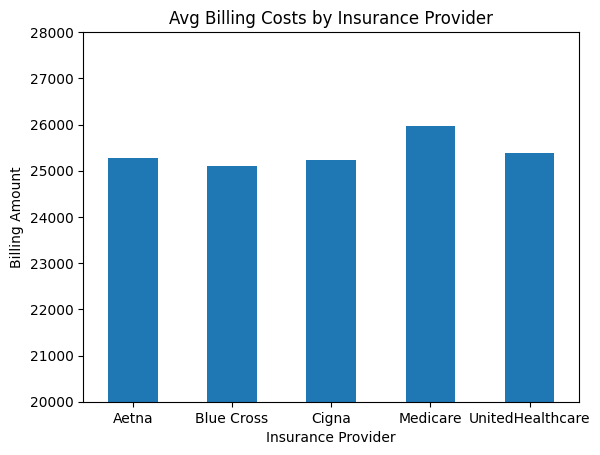

In [126]:
# Group by hospital and sum billing costs
Insurance_billing = hospital_df_2024_drop.groupby("Insurance Provider" )["Billing Amount"].mean()
# Create a bar plot
Insurance_billing.plot(kind="bar", title="Avg Billing Costs by Insurance Provider", xlabel="Insurance Provider", ylabel="Billing Amount",ylim=(20000,28000))
plt.xticks(rotation=0)
plt.show()

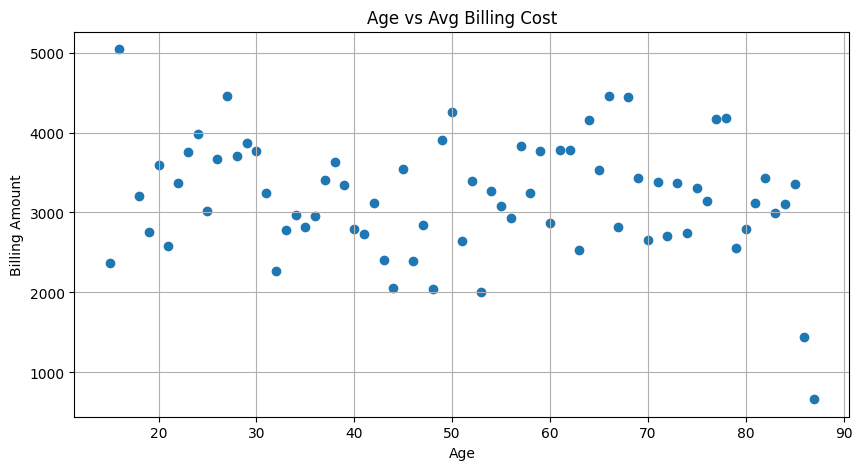

In [127]:
# creates df to store the average billing amount by age
age_vs_billing = hospital_df_2024_drop.groupby("Age")["Cost Per Day"].mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(age_vs_billing["Age"], age_vs_billing["Cost Per Day"])
plt.title("Age vs Avg Billing Cost")
plt.xlabel("Age")
plt.ylabel("Billing Amount")
plt.grid(True)
plt.show()

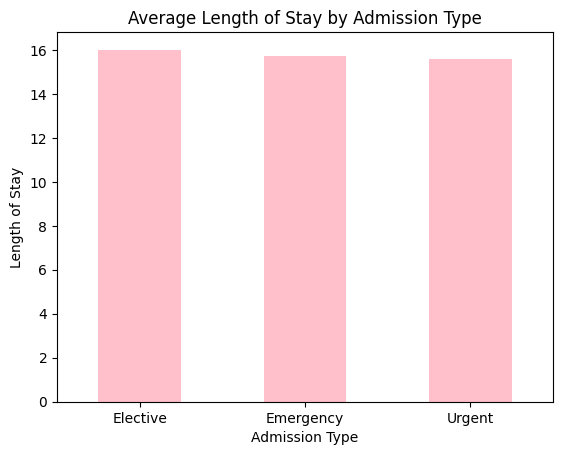

In [128]:
# Group by hospital and sum billing costs
Insurance_billing = hospital_df_2024_drop.groupby("Admission Type" )["Length of Stay"].mean()

# Create a bar plot
Insurance_billing.plot(kind="bar", title="Average Length of Stay by Admission Type", xlabel="Admission Type", ylabel="Length of Stay", color="pink")
plt.xticks(rotation=0)
plt.show()

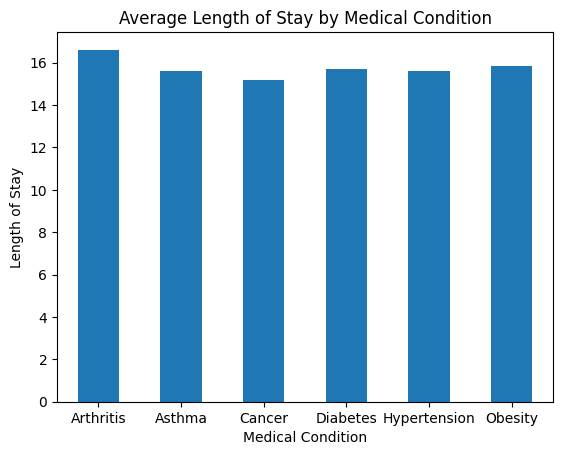

In [129]:
# Group by hospital and sum billing costs
Insurance_billing = hospital_df_2024_drop.groupby("Medical Condition" )["Length of Stay"].mean()

# Create a bar plot
Insurance_billing.plot(kind="bar", title="Average Length of Stay by Medical Condition", xlabel="Medical Condition", ylabel="Length of Stay")
plt.xticks(rotation=0)
plt.show()

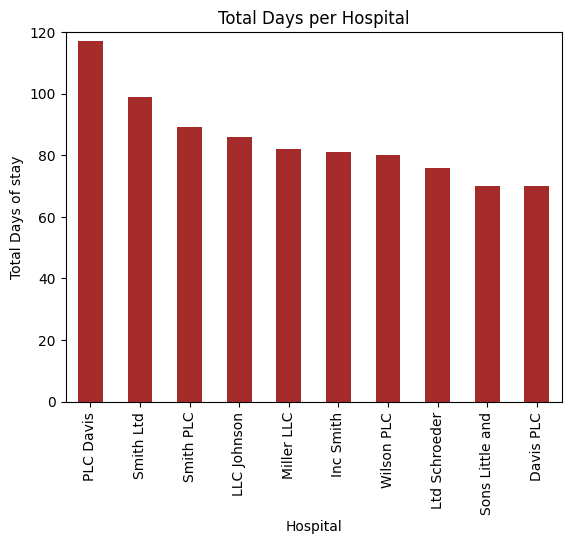

In [130]:
# Calculate the Length of stay by each hospital
hospital_stay = hospital_df_2024_drop.groupby("Hospital")["Length of Stay"].sum()

# Show lenght of stay by hospital in decending order.
top_hospitals = hospital_stay.sort_values(ascending=False).head(10)

# Show a line charg of the decending lenght of stay.
top_hospitals.plot(kind="bar", title="Total Days per Hospital", xlabel="Hospital", ylabel="Total Days of stay", color="brown", ylim=(0,120))
plt.xticks(rotation=90)

plt.show()


In [131]:
counts = hospital_df["Hospital"].value_counts()
counts

Hospital
LLC Smith                     44
Ltd Smith                     39
Johnson PLC                   38
Smith Ltd                     37
Smith PLC                     36
                              ..
Hammond Ltd                    1
Moran Smith and Galloway,      1
Winters Martin, and Neal       1
James-Owen                     1
Marks, and Vazquez Jenkins     1
Name: count, Length: 39876, dtype: int64

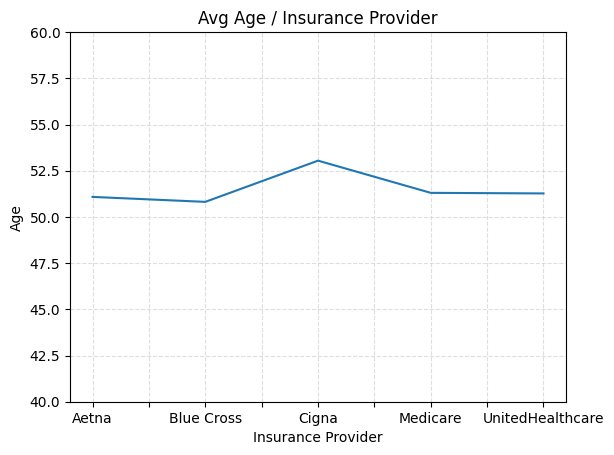

In [132]:
# Group by hospital and sum billing costs
Insurance_billing = hospital_df_2024_drop.groupby("Insurance Provider" )["Age"].mean()
# Create a bar plot
Insurance_billing.plot(kind="line", title="Avg Age / Insurance Provider", xlabel="Insurance Provider", ylabel="Age",ylim=(40,60))
plt.xticks(rotation=0)
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.show()

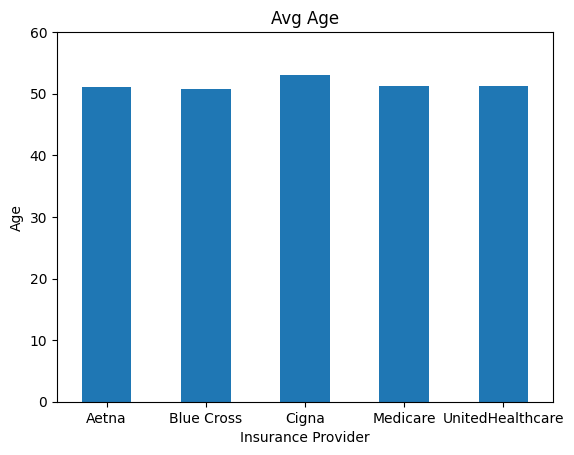

In [133]:
# Group by hospital and sum billing costs
Insurance_billing = hospital_df_2024_drop.groupby("Insurance Provider" )["Age"].mean()
# Create a bar plot
Insurance_billing.plot(kind="bar", title="Avg Age", xlabel="Insurance Provider", ylabel="Age",ylim=(0,60))
plt.xticks(rotation=0)
plt.show()